#### 0. pandas 패키지 import

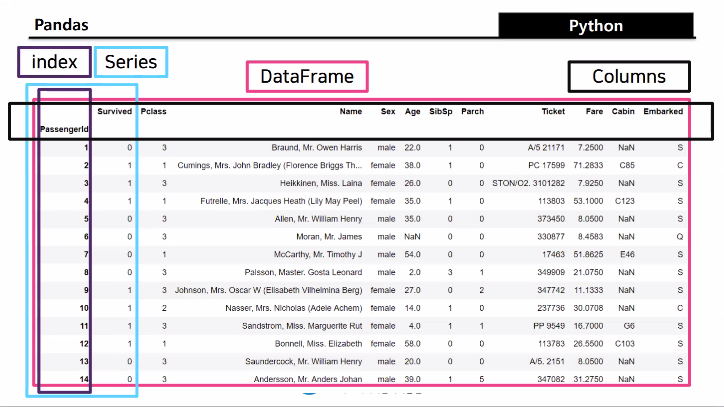

- 표 형태의 데이터를 다루는데 특화된 도구 
- 데이터를 색인하는 index 개념을 행과 열에 따라 다른 명칭 부여 
- 행을 색인하는 인덱스 -> index 
- 열을 색인하는 인덱스 -> column
- 1차원 데이터를 표현하는 클래스 -> Series
- 2차원 데이터를 표현하는 클래스 -> DataFrame

In [1]:
import pandas as pd

#### 1. Series 사용하기

In [14]:
# series 생성
h = pd.Series([179, 165, 140, 158, 192])
h

0    179
1    165
2    140
3    158
4    192
dtype: int64

In [4]:
#글자 인덱스 부여해서 Series 생성
w = pd.Series([60, 58, 81, 77, 47], index=["선영표", "정봉균", "황해도",
                                           "박병관", "정형"])
w

선영표    60
정봉균    58
황해도    81
박병관    77
정형     47
dtype: int64

In [6]:
# 이름을 부여해서 Series 생성
w = pd.Series([60, 58, 81, 77, 47], index=["선영표", "정봉균", "황해도",
                                           "박병관", "정형"],
              name = "몸무게")
w

선영표    60
정봉균    58
황해도    81
박병관    77
정형     47
Name: 몸무게, dtype: int64

In [9]:
# 속성 활용하기
display(w.shape) # 모양 확인
display(w.values) # numpy 타입으로 값 확인 
display(w.index) # 인덱스만 꺼내고 싶은 경우
display(w.dtype) # 데이터 타입을 알고 싶은 경우

(5,)

array([60, 58, 81, 77, 47], dtype=int64)

Index(['선영표', '정봉균', '황해도', '박병관', '정형'], dtype='object')

dtype('int64')

In [12]:
# 연산 -> 같은 인덱스끼리 요소별 연산 지원 
# 같은 인덱스가 없는 경우 연산 할 수 없어 NaN 발생 
# NaN = Not a Number : (데이터 분석에서는) 데이터가 없다 
w / ( h ** 2)


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
박병관   NaN
선영표   NaN
정봉균   NaN
정형    NaN
황해도   NaN
dtype: float64

In [15]:
# 키 데이터에 인덱스를 부여
h.index = ["선영표", "정봉균", "황해도", "박병관", "정형"]
h

선영표    179
정봉균    165
황해도    140
박병관    158
정형     192
dtype: int64

In [16]:
# cm -> m단위로 변경 후 계산
w / ((h/100) * 2)

선영표    16.759777
정봉균    17.575758
황해도    28.928571
박병관    24.367089
정형     12.239583
dtype: float64

In [22]:
# 인덱싱 & 슬라이싱
display(h["선영표"])
display(h[0])
display(h[["선영표", "정봉균"]])
display(h[[0,3]])
display(w[1:4]) # 숫자 슬라이싱은 끝에서 하나 작을 때까지
display(w["선영표":"박병관"]) # 글자 슬라이싱은 적힌 인덱스까지

179

179

선영표    179
정봉균    165
dtype: int64

선영표    179
박병관    158
dtype: int64

정봉균    58
황해도    81
박병관    77
Name: 몸무게, dtype: int64

선영표    60
정봉균    58
황해도    81
박병관    77
Name: 몸무게, dtype: int64

In [25]:
# boolean 색인
java = pd.Series({"선영표":90, "박병관":79, "정봉균":57, "정형":99})
java[java<=80]

박병관    79
정봉균    57
dtype: int64

In [26]:
# 조건을 여러개 넣고 싶은 경우 
java[(java>=90)|(java<=60)]

선영표    90
정봉균    57
정형     99
dtype: int64

#### 2. DataFrame 사용하기

In [27]:
#생성
df = pd.DataFrame([['선영표', 160, 56],
                   ['박병관', 175, 80],
                   ['정봉균', 179, 76]])
df

,0,1,2
0,선영표,160,56
1,박병관,175,80
2,정봉균,179,76


In [28]:
# 글자 인덱스를 부여해서 생성
#생성
df = pd.DataFrame([['선영표', 160, 56],
                   ['박병관', 175, 80],
                   ['정봉균', 179, 76]],
                   index = ['1번', '2번', '3번'],
                   columns = ['이름', '키', '몸무게'])
df

,이름,키,몸무게
1번,선영표,160,56
2번,박병관,175,80
3번,정봉균,179,76


In [30]:
# 속성
display(df.shape) #모양확인
display(df.values) #numpy배열로 값만 추출 
display(df.index) # 행 인덱스 추출
display(df.columns) # 열 인덱스 추출
display(df.dtypes) # 각 열별 데이터 타입 확인


(3, 3)

array([['선영표', 160, 56],
       ['박병관', 175, 80],
       ['정봉균', 179, 76]], dtype=object)

Index(['1번', '2번', '3번'], dtype='object')

Index(['이름', '키', '몸무게'], dtype='object')

In [31]:
# 연산 -> numpy 연산과 동일
df['몸무게']/(df['키']/100) ** 2

1번    21.875000
2번    26.122449
3번    23.719609
dtype: float64

In [35]:
# index & slicing
# 인덱싱: 기본적으로 열 기준으로 색인하는 것을 우선시 
display(df['몸무게']) #시리즈
display(df[['몸무게', '키']]) #데이터프레임
# 데이터타입에서 하나의 열을 가져오면 시리즈로 변환됨(1차원이니까!)
# 슬라이싱 : 기본적으로 행 기준으로 색인하는 것을 우선시 
display(df["키":"몸무게"])
display(df["1번":"2번"])

1번    56
2번    80
3번    76
Name: 몸무게, dtype: int64

,몸무게,키
1번,56,160
2번,80,175
3번,76,179


,이름,키,몸무게


,이름,키,몸무게
1번,선영표,160,56
2번,박병관,175,80


In [33]:
df['1번'] 
# 에러 발생 => "열" 인덱스가 아니라 "행" 인덱스이기 때문에 인식하지 못함

KeyError: '1번'

In [ ]:
# 헷갈리는 걸 방지하기 위해 추천하는 인덱서
# iloc와 loc 
# display(df.loc[행, 열]) : 글자, 숫자 인덱스 
# display(df.iloc[행, 열]) : 숫자 인덱스 